<a href="https://colab.research.google.com/github/rich-hyun/Kuggle_9th_team_SAMTARBUCKS/blob/main/Tang_NLP_kuggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # 넘파이
import pandas as pd # 판다스
import os # (기본 내장 라이브러리) os
import matplotlib.pyplot as plt # 맷플롯립
import seaborn as sns # 씨본

In [2]:
import pandas as pd
from datetime import datetime
import calendar

# 데이터 로딩
df = pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Kuggle_9th_team_/main/reviews_data.csv',  encoding='utf-8')

# 'Date' 열에서 월, 일, 연도를 추출하여 새로운 열에 저장
# 'Reviewed' 다음에 오는 단어를 'mnth' 열에 저장
df['mnth'] = df['Date'].str.extract(r'Reviewed\s+([A-Za-z]+)')
df['day'] = df['Date'].str.extract(r'(\d{1,2}),').astype('int')
df['year'] = df['Date'].str.extract(r'(\d{4})').astype('int')

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
months_map = {
    'Jan': 1, 'Feb': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# 'mnth' 열의 월 이름을 숫자로 변환
df['mnth_num'] = df['mnth'].map(months_map)

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
month_mapping = {v: k for k,v in enumerate(calendar.month_name)}

# 월 이름을 월 번호로 변환
df['month_num'] = df['mnth'].map(month_mapping)

# 날짜로부터 요일을 계산하여 'day2' 열에 저장
df['day2'] = df.apply(lambda row: datetime.strptime(f"{row['year']}-{row['mnth_num']}-{row['day']}", '%Y-%m-%d').strftime('%A'), axis=1)

# 요일 이름을 숫자로 매핑하는 딕셔너리 생성
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# 'day2' 열의 요일 이름을 숫자로 변환
df['day2_num'] = df['day2'].map(day_to_num)

# 원하는 열만 선택 (새로운 'day2_num' 열을 포함하도록 업데이트)
df = df[['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num', 'Rating', 'Review']]
# 'Rating' 또는 'Review'가 NaN인 행을 제거
df.dropna(subset=['Rating', 'Review'], inplace = True)



In [3]:
!pip install gender-guesser

import gender_guesser.detector as gender
d = gender.Detector()

for i in df.index:
  name = df.loc[i,'name']
  df.loc[i, 'get_gender'] = d.get_gender(name)
df.get_gender.value_counts()

female           281
male             180
unknown          179
mostly_female     36
mostly_male       22
andy               3
Name: get_gender, dtype: int64

In [4]:
df

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review,get_gender
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...,female
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...,mostly_female
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...,unknown
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...,mostly_male
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...,unknown
...,...,...,...,...,...,...,...,...,...,...
696,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",2011,10,2,6,1.0,I ordered Via Starbucks coffee online. I recei...,female
697,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",2011,8,31,2,3.0,"My name is Ric **, I am journalist by professi...",unknown
698,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",2011,8,24,2,1.0,"The bagel was ice cold, not cut and not toasted.",female
699,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",2011,8,15,0,1.0,"In the morning of Monday, August 15, 2011, at ...",female


###EDA

In [5]:
##Date에 Reviewed 지우

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 745
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        701 non-null    object 
 1   location    701 non-null    object 
 2   Date        701 non-null    object 
 3   year        701 non-null    int64  
 4   mnth_num    701 non-null    int64  
 5   day         701 non-null    int64  
 6   day2_num    701 non-null    int64  
 7   Rating      701 non-null    float64
 8   Review      701 non-null    object 
 9   get_gender  701 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 76.4+ KB


count     701.000000
mean      487.365193
std       228.670763
min        14.000000
25%       285.000000
50%       475.000000
75%       671.000000
max      1161.000000
Name: Review, dtype: float64


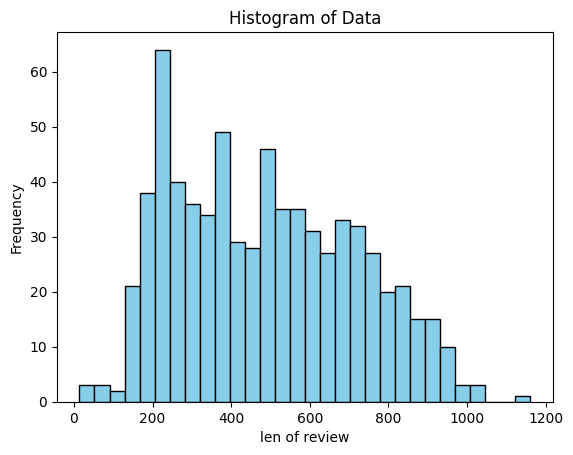

In [7]:
df_len = df.Review.apply(len)
print(df_len.describe())
plt.hist(df_len, bins=30, color='skyblue', edgecolor='black')  # 데이터와 bin 개수, 색상, 테두리색상 설정
plt.xlabel('len of review')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정
plt.show()  # 그래프 출력


(-0.5, 799.5, 599.5, -0.5)

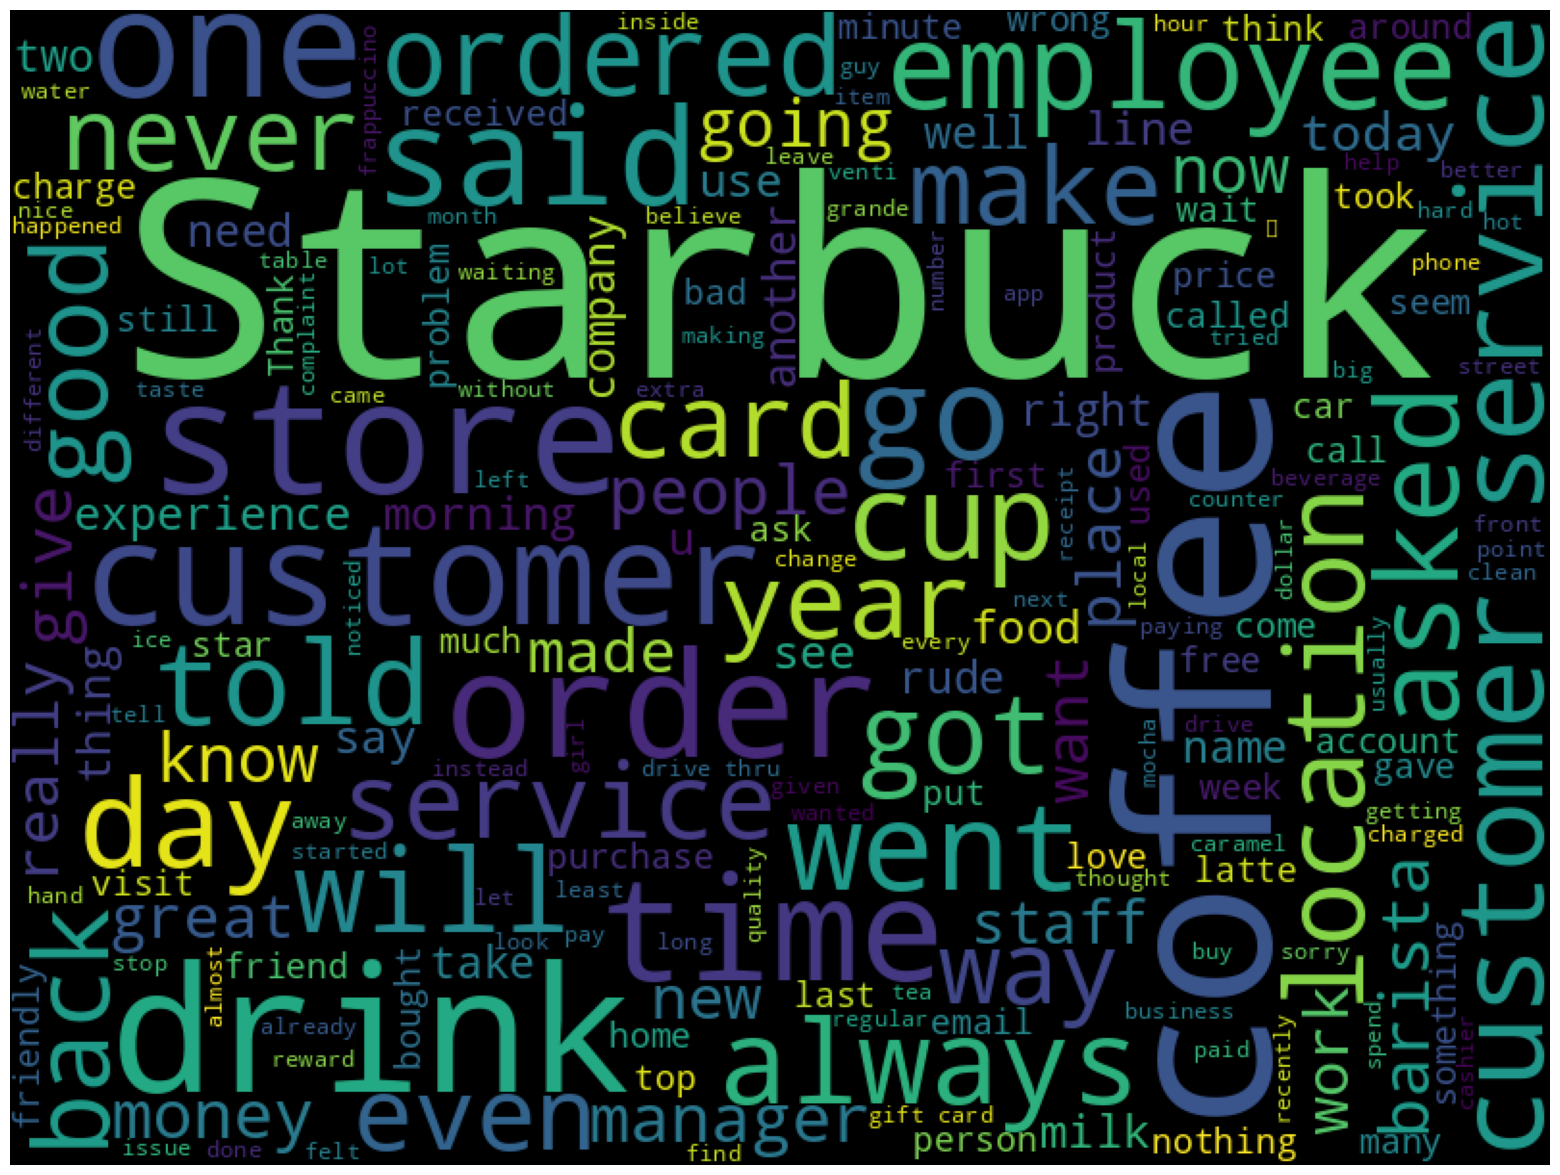

In [8]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(df['Review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

1.0    448
2.0     98
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64


(array([448.,   0.,  98.,   0.,   0.,  33.,   0.,  39.,   0.,  83.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

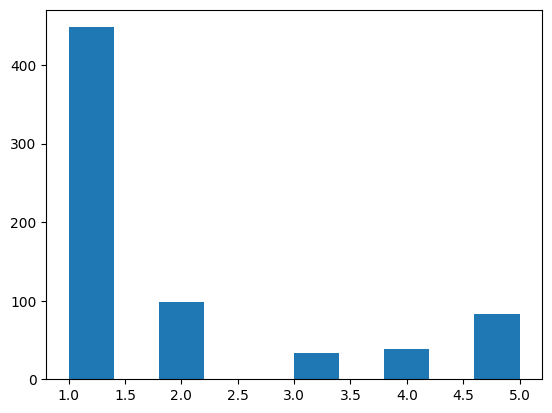

In [9]:
print(df['Rating'].value_counts())
plt.hist(df['Rating'])
#1점 데이터가 많았

8     83
9     82
11    62
12    60
10    56
7     54
2     53
5     52
4     52
3     52
6     48
1     47
Name: mnth_num, dtype: int64


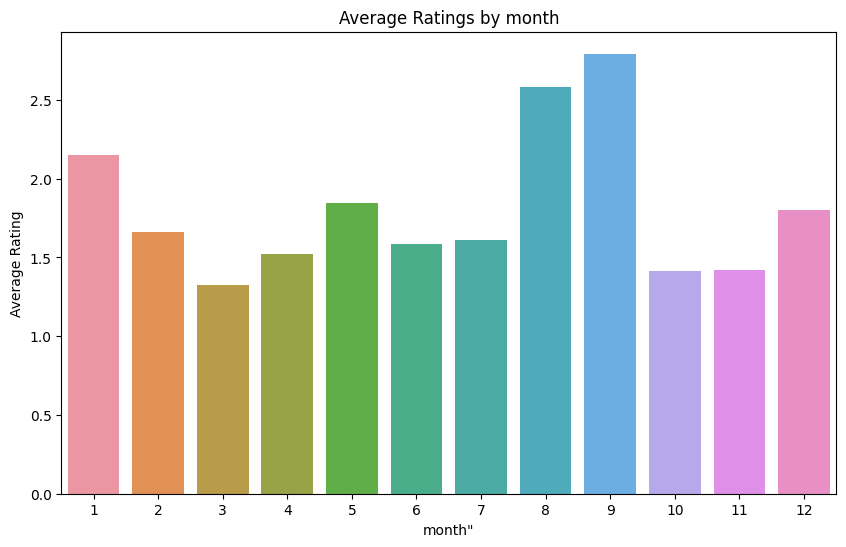

In [10]:
print(df['mnth_num'].value_counts())
average_ratings = df.groupby('mnth_num')['Rating'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_ratings, x='mnth_num', y='Rating')
plt.title('Average Ratings by month')
plt.xlabel('month"')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-11-6d8701039c6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


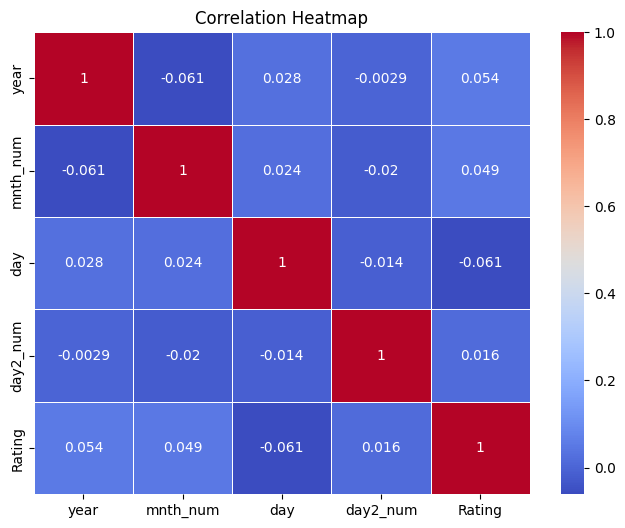

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.columns

Index(['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num',
       'Rating', 'Review', 'get_gender'],
      dtype='object')

In [13]:
from plotly.express import bar
bar(data_frame=df['name'].value_counts().to_frame())

In [14]:
# 맨뒤 알파벳 두글자로 지역
df['newloc'] = df['location'].str[-2:]
df.newloc.unique()

array(['TX', 'FL', 'PA', 'WA', 'OR', 'NC', 'MD', 'er', 'CA', 'OH', 'HI',
       'NJ', 'GA', 'DC', 'AZ', 'MA', 'VA', 'NV', 'TN', 'IA', 'WI', 'NH',
       'AR', 'MN', 'IN', 'MO', 'IL', 'MI', 'CO', 'OK', 'UT', 'KY', 'ME',
       'KS', 'ON', 'BC', 'NY', 'NE', 'AK', 'AB', 'ID', 'ER', 'da', 'LA',
       'UK', 'om', 'MB', 'SK', 'ia', 'ng', 'an', 'na', 'NL', 'NM', 'ta',
       'la', 'WV', 'i.', 'ne', 'rk', 'NS', 'ND', 'do', 'RI', 'SC', 'WY',
       'MS', 'AL', 'QC', 'MT', 'CT', 'ca', 'tx', 'fl', 'ma', 'ED', 'oh'],
      dtype=object)

In [15]:
#소문자는 else로 취급
df['newloc'] = df['newloc'].apply(lambda x: x if x.isupper() else 'else')
df.newloc.unique()

array(['TX', 'FL', 'PA', 'WA', 'OR', 'NC', 'MD', 'else', 'CA', 'OH', 'HI',
       'NJ', 'GA', 'DC', 'AZ', 'MA', 'VA', 'NV', 'TN', 'IA', 'WI', 'NH',
       'AR', 'MN', 'IN', 'MO', 'IL', 'MI', 'CO', 'OK', 'UT', 'KY', 'ME',
       'KS', 'ON', 'BC', 'NY', 'NE', 'AK', 'AB', 'ID', 'ER', 'LA', 'UK',
       'MB', 'SK', 'NL', 'NM', 'WV', 'NS', 'ND', 'RI', 'SC', 'WY', 'MS',
       'AL', 'QC', 'MT', 'CT', 'ED'], dtype=object)

In [16]:
#CA 가 매우 많음
bar(data_frame=df['newloc'].value_counts().to_frame())

In [17]:
df[df['newloc']=='CA']['Rating'].value_counts().to_frame()

,Rating
1.0,86
2.0,24
4.0,11
5.0,9
3.0,8


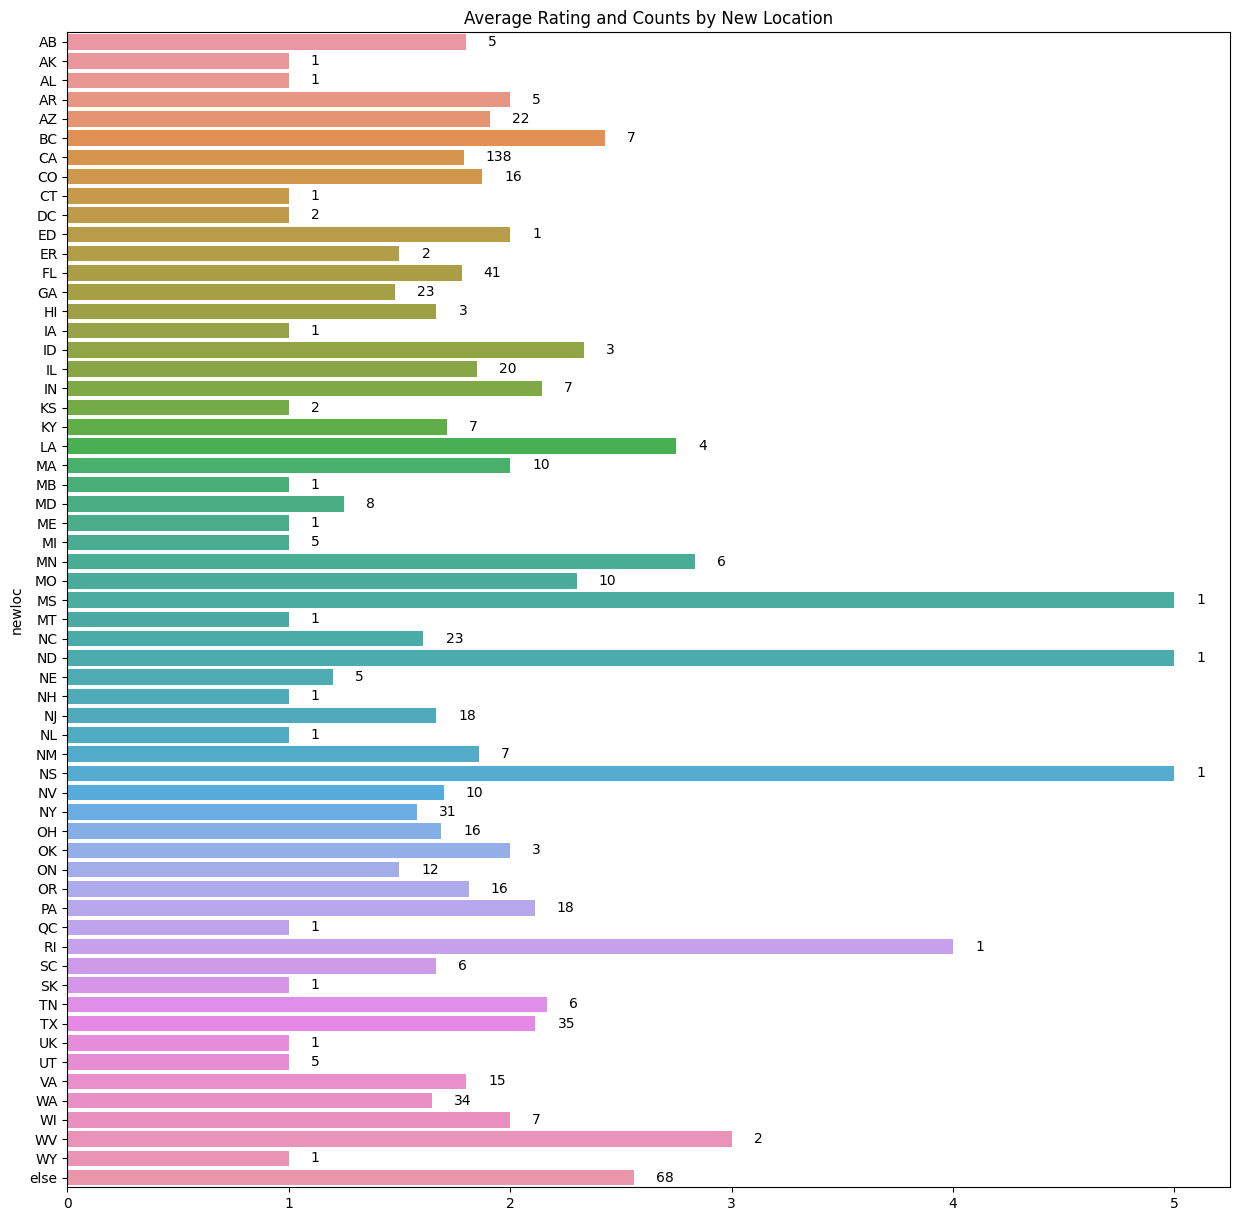

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'newloc' 별로 평균 'Rating'과 관측치 수 계산
average_rating = df.groupby('newloc')['Rating'].mean()
counts = df['newloc'].value_counts()

# 가로 막대그래프 생성
plt.figure(figsize=(15,15))
bar = sns.barplot(y=average_rating.index, x=average_rating.values, orient='h')
plt.title('Average Rating and Counts by New Location')

# 각 막대에 관측치 수 표시
for i, p in enumerate(bar.patches):
    width = p.get_width()
    bar.text(width + 0.1, p.get_y()+p.get_height()/2.,
             counts[average_rating.index[i]], va="center")

plt.show()


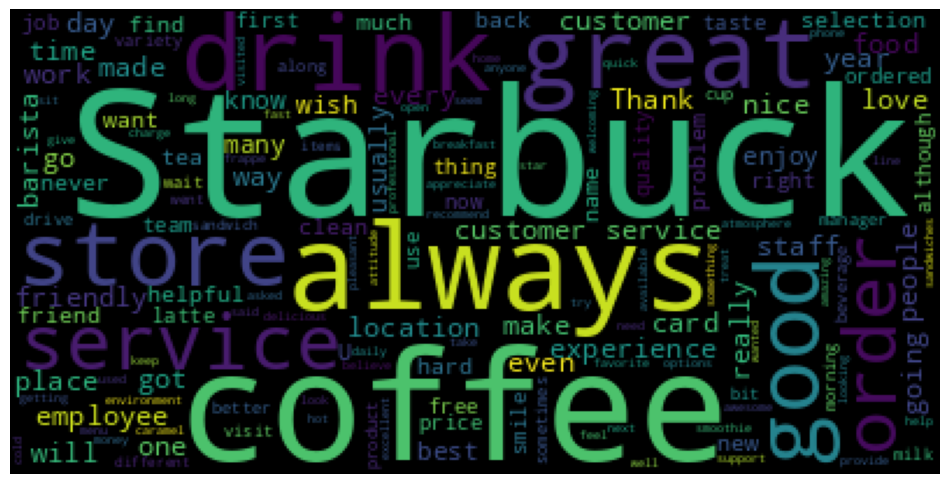

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from matplotlib.pyplot import subplots
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(random_state=2023).generate(' '.join(df[df['Rating'] > 3]['Review'].values.tolist())))

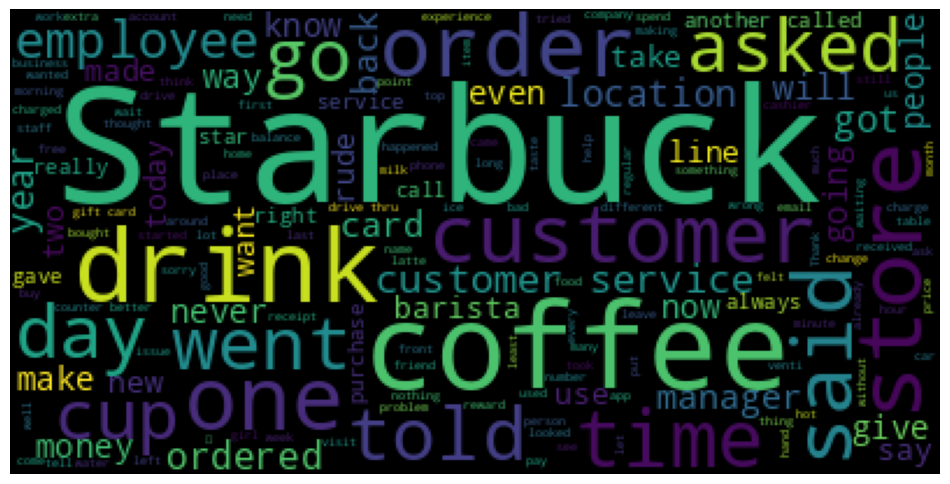

In [20]:
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(random_state=2023).generate(' '.join(df[df['Rating'] ==1]['Review'].values.tolist())))

## 토픽모델링

In [22]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from collections import Counter

# nltk 불용어
stop_words = set(stopwords.words('english'))

# 어간 추출을 위한 스테머를 생성합니다.
stemmer = PorterStemmer()

def remove_stopwords(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # 특수문자 제거
    text = text.lower() # 소문자 변환
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [stemmer.stem(word) for word in tokens] # 어간 추출
    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거

    # 빈도가 1인 단어를 제거합니다.
    word_counts = Counter(tokens)
    tokens = [word for word in tokens if word_counts[word] > 1]

    return tokens

# 'Review' 컬럼 데이터 토큰화 및 불용어 제거
df['tokens'] = df['Review'].apply(remove_stopwords)

# 사전 생성
dictionary = corpora.Dictionary(df['tokens'] )

# 단어 빈도 계산
corpus = [dictionary.doc2bow(text) for text in df['tokens'] ]

# TF-IDF 모델 생성 및 코퍼스 변환
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# LDA 모델 생성
lda_model = models.LdaModel(corpus_tfidf, num_topics=12, id2word=dictionary, chunksize=2000, passes=1)

# 토픽 출력
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


(0, '0.027*"coffe" + 0.017*"starbuck" + 0.017*"peopl" + 0.017*"year" + 0.017*"go" + 0.011*"order" + 0.009*"wait" + 0.009*"good" + 0.009*"place" + 0.008*"work"')
(1, '0.015*"wa" + 0.015*"cup" + 0.014*"card" + 0.012*"starbuck" + 0.011*"coffe" + 0.010*"got" + 0.008*"day" + 0.008*"custom" + 0.007*"car" + 0.007*"servic"')
(2, '0.020*"store" + 0.019*"starbuck" + 0.014*"thi" + 0.012*"coffe" + 0.011*"card" + 0.010*"wa" + 0.009*"like" + 0.009*"bad" + 0.008*"employe" + 0.007*"veri"')
(3, '0.020*"go" + 0.019*"drink" + 0.014*"store" + 0.014*"wa" + 0.010*"thi" + 0.010*"order" + 0.010*"good" + 0.009*"said" + 0.008*"locat" + 0.008*"like"')
(4, '0.017*"custom" + 0.015*"coffe" + 0.014*"day" + 0.014*"starbuck" + 0.013*"servic" + 0.011*"wa" + 0.011*"like" + 0.010*"morn" + 0.008*"could" + 0.007*"veri"')
(5, '0.020*"time" + 0.018*"coffe" + 0.012*"starbuck" + 0.011*"custom" + 0.010*"call" + 0.010*"get" + 0.009*"drink" + 0.009*"wa" + 0.008*"ha" + 0.008*"store"')
(6, '0.021*"coffe" + 0.021*"drink" + 0.020*"or

In [28]:
from gensim.models import CoherenceModel

# 토픽 수에 따른 Perplexity와 Coherence를 저장할 리스트
perplexity_values = []
coherence_values = []

# 토픽 수를 1부터 30까지 바꿔가며 모델을 학습하고, Perplexity와 Coherence를 계산
for num_topics in range(1, 31):
    lda_model = models.LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=20, iterations=400)
    perplexity_values.append(lda_model.log_perplexity(corpus_tfidf))  # Perplexity 저장

    # Coherence 계산
    coherence_model = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())  # Coherence 저장

# 결과 출력
for num_topics, perplexity, coherence in zip(range(1, 31), perplexity_values, coherence_values):
    print(f"Number of Topics: {num_topics}, Perplexity: {perplexity}, Coherence: {coherence}")

#최적 토픽수 14..

Number of Topics: 1, Perplexity: -6.690318594058124, Coherence: 0.3855301990792117
Number of Topics: 2, Perplexity: -7.150810270817513, Coherence: 0.31683557999063217
Number of Topics: 3, Perplexity: -7.528965599135443, Coherence: 0.367672192803054
Number of Topics: 4, Perplexity: -7.860845542865245, Coherence: 0.3352060688140922
Number of Topics: 5, Perplexity: -8.100393154283656, Coherence: 0.34320065367126834
Number of Topics: 6, Perplexity: -8.374364811827157, Coherence: 0.34535225870964137
Number of Topics: 7, Perplexity: -8.533334404664132, Coherence: 0.3955178294064335
Number of Topics: 8, Perplexity: -8.763539260761952, Coherence: 0.3925575405262818
Number of Topics: 9, Perplexity: -8.913970742395575, Coherence: 0.40047926193037287
Number of Topics: 10, Perplexity: -9.085107641762825, Coherence: 0.387077572450583
Number of Topics: 11, Perplexity: -9.208188211483609, Coherence: 0.42442776471363075
Number of Topics: 12, Perplexity: -9.371257947152198, Coherence: 0.410211317890639

In [29]:
# Coherence 값이 가장 높은 토픽 수 찾기
optimal_topics = coherence_values.index(max(coherence_values)) + 1

# 결과 출력
print(f"The optimal number of topics is {optimal_topics}")


The optimal number of topics is 27


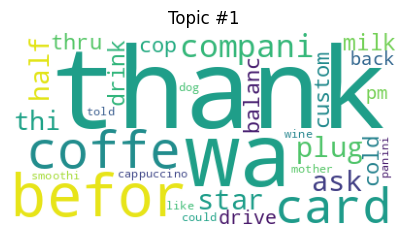

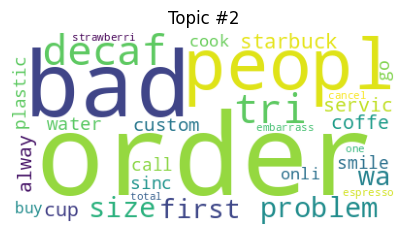

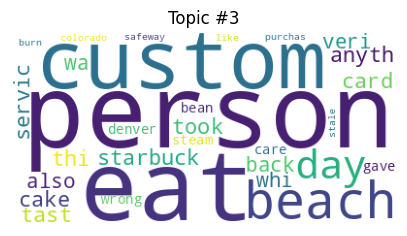

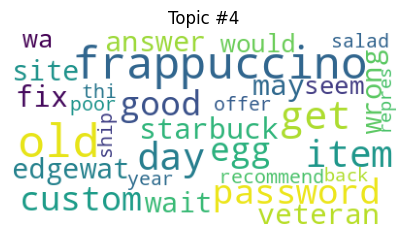

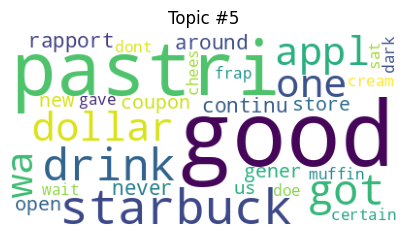

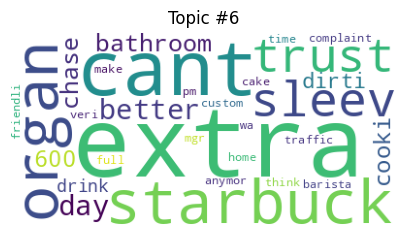

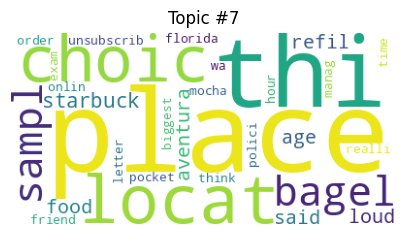

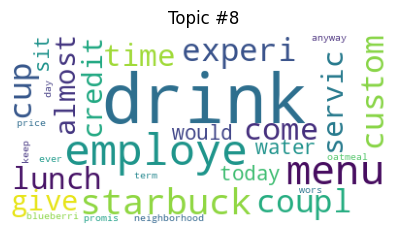

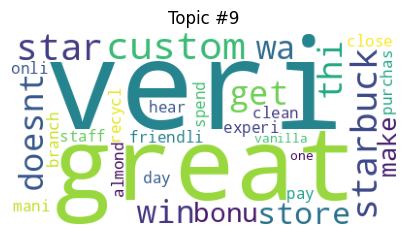

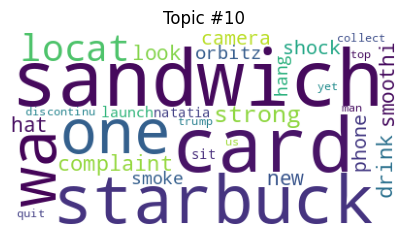

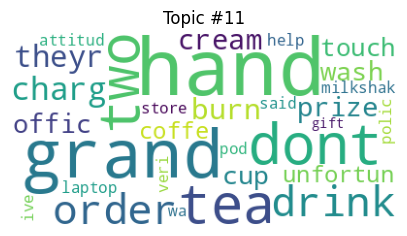

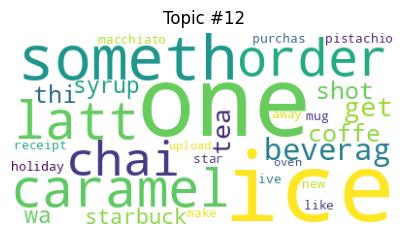

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 각 토픽에 대한 워드클라우드 생성
for i, topic in enumerate(topics):
    plt.figure(figsize=(5,5))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title("Topic #" + str(i+1))
    plt.show()


In [31]:
df[['Review','tokens']]
# 토큰화가 이상함

,Review,tokens
0,Amber and LaDonna at the Starbucks on Southwes...,"[alway, alway, smile, alway, alway, smile]"
1,** at the Starbucks by the fire station on 436...,"[starbuck, make, drink, make, experi, wa, expe..."
2,I just wanted to go out of my way to recognize...,"[locat, wa, place, order, locat, make, order, ..."
3,Me and my friend were at Starbucks and my card...,"[card, work, thank, paid, drink, wa, paid, dri..."
4,I?셫 on this kick of drinking 5 cups of warm wa...,"[water, starbuck, water, starbuck, give, give,..."
...,...,...
696,I ordered Via Starbucks coffee online. I recei...,"[order, order, order]"
697,"My name is Ric **, I am journalist by professi...","[starbuck, coffe, starbuck, coffe]"
698,"The bagel was ice cold, not cut and not toasted.",[]
699,"In the morning of Monday, August 15, 2011, at ...","[one, venti, cafe, frapp, one, venti, cafe, fr..."


직원에 대한 평가, 가격에 대한 평가

In [33]:
# '직원'이 포함된 행 찾기
employee_reviews = df[df['Review'].str.contains('employee')]

# '가격'이 포함된 행 찾기
price_reviews = df[df['Review'].str.contains('price')]

# 결과 출력
print("직원에 대한 평가가 포함된 행:")
print(employee_reviews.index)

print("가격에 대한 평가가 포함된 행:")
print(price_reviews.index)


직원에 대한 평가가 포함된 행:
Int64Index([  2,   5,  17,  25,  31,  47,  52,  54,  55,  64,  65,  72,  77,
             78,  81,  84,  85,  86,  87,  90,  98, 112, 119, 137, 142, 151,
            152, 168, 176, 188, 214, 215, 226, 227, 233, 238, 247, 284, 307,
            313, 314, 327, 332, 333, 353, 363, 368, 373, 375, 376, 377, 379,
            381, 383, 385, 386, 392, 406, 420, 449, 451, 456, 463, 467, 470,
            475, 480, 485, 491, 509, 519, 520, 523, 528, 531, 536, 555, 572,
            573, 598, 601, 608, 615, 619, 620, 621, 627, 633, 636, 641, 646,
            651, 654, 656, 658, 663, 670, 679, 690, 695],
           dtype='int64')
가격에 대한 평가가 포함된 행:
Int64Index([ 20,  21,  49,  54,  64,  71,  79,  87,  94, 101, 105, 115, 125,
            131, 135, 145, 161, 169, 173, 175, 177, 180, 192, 200, 208, 224,
            257, 268, 283, 295, 300, 305, 306, 323, 332, 335, 343, 352, 356,
            359, 383, 392, 417, 427, 428, 434, 466, 469, 485, 507, 547, 578,
            588, 618, 629, 649, 6

In [35]:
# '직원'이 포함된 리뷰에서 '직원'의 빈도수를 계산합니다.
employee_reviews['employee_count'] = employee_reviews['Review'].apply(lambda x: x.count('employee'))
employee_reviews['employee_count']

<ipython-input-35-cea87aa1d424>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2      1
5      1
17     1
25     2
31     1
      ..
663    1
670    2
679    1
690    1
695    3
Name: employee_count, Length: 100, dtype: int64